In [44]:
!pip install polars
!pip install japanize_matplotlib
!pip install --user --force-reinstall pyarrow

  Using cached pyarrow-22.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.2 kB)
Using cached pyarrow-22.0.0-cp312-cp312-manylinux_2_28_x86_64.whl (47.7 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 22.0.0
    Uninstalling pyarrow-22.0.0:
      Successfully uninstalled pyarrow-22.0.0


In [45]:
import os
import polars as pl
from matplotlib import pyplot as plt
# plt.rcParams['font.family'] = ['IPAexGothic']
import japanize_matplotlib

In [46]:
df_pos = pl.read_csv('./data/pos.csv', encoding='utf-8-sig')
df_product = pl.read_csv('./data/product.csv', encoding='utf-8-sig')
df_weather = pl.read_csv('./data/weather.csv', encoding='utf-8-sig')

季節ごとの売り上げ<br>
季節ごとの合計売上金額<br>
季節ごとの売上個数<br>
顧客の分布<br>
顧客ごとの売上金額<br>
支払い方法の分布<br>
顧客ごとの支払い方法<br>
天気ごとの売り上げ

### 季節ごとの商品売り上げ

Text(0, 0.5, '売上個数')

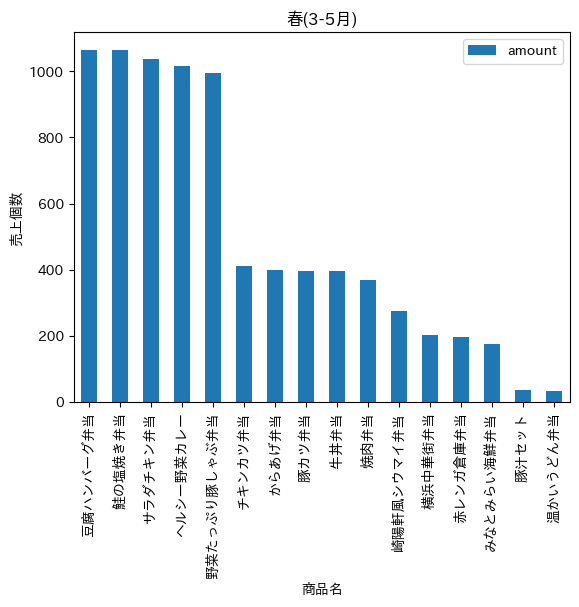

In [4]:
# 3-5月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .filter(pl.col('month').is_in([3, 4, 5]))
 .group_by('product_name')
 .agg(pl.col('amount').count())
 .sort('amount' ,descending=True)

 .to_pandas()
 .plot(kind='bar', x='product_name', y='amount')
 )

plt.title('春(3-5月)')
plt.xlabel('商品名')
plt.ylabel('売上個数')

Text(0, 0.5, '売上個数')

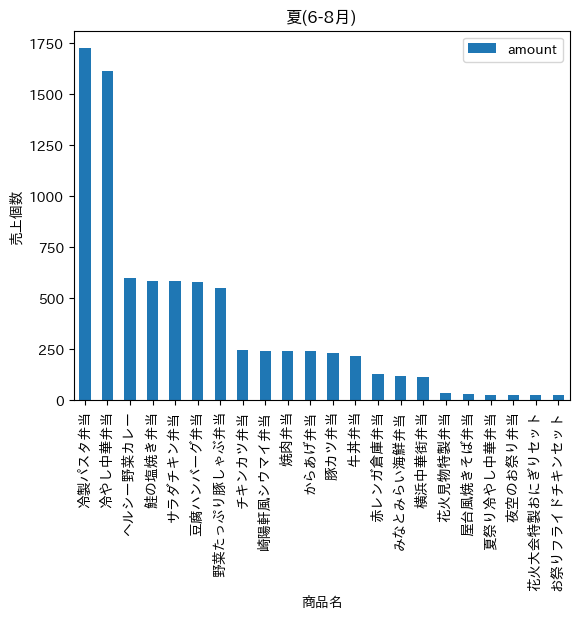

In [5]:
# 6-8月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .filter(pl.col('month').is_in([6, 7, 8]))
 .group_by('product_name')
 .agg(pl.col('amount').count())
 .sort('amount' ,descending=True)

 .to_pandas()
 .plot(kind='bar', x='product_name', y='amount')
 )

plt.title('夏(6-8月)')
plt.xlabel('商品名')
plt.ylabel('売上個数')


Text(0, 0.5, '売上個数')

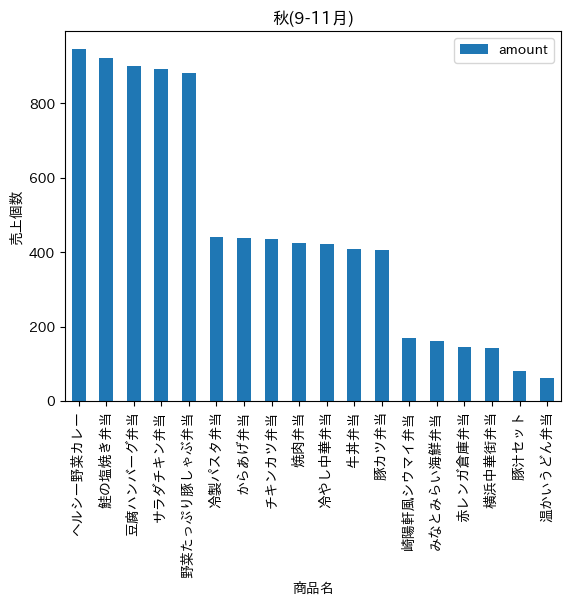

In [47]:
# 9-11月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .filter(pl.col('month').is_in([9, 10, 11]))
 .group_by('product_name')
 .agg(pl.col('amount').count())
 .sort('amount' ,descending=True)

 .to_pandas()
 .plot(kind='bar', x='product_name', y='amount')
 )

plt.title('秋(9-11月)')
plt.xlabel('商品名')
plt.ylabel('売上個数')


Text(0, 0.5, '売上個数')

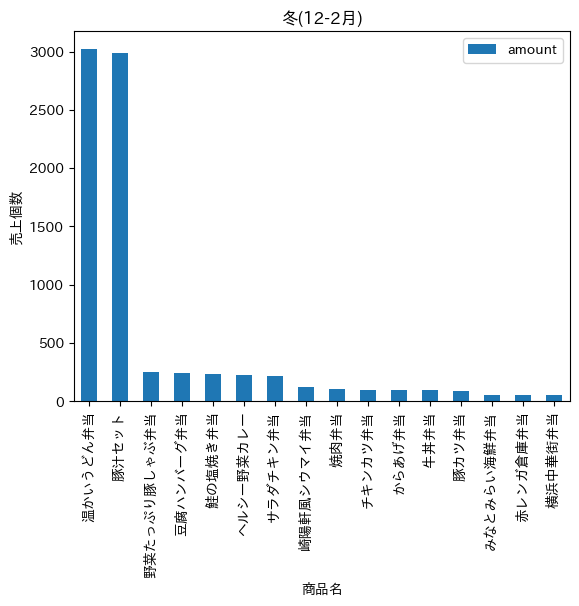

In [7]:
# 12-2月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .filter(pl.col('month').is_in([12, 1, 2]))
 .group_by('product_name')
 .agg(pl.col('amount').count())
 .sort('amount' ,descending=True)

 .to_pandas()
 .plot(kind='bar', x='product_name', y='amount')
 )

plt.title('冬(12-2月)')
plt.xlabel('商品名')
plt.ylabel('売上個数')


### 季節ごとの売上金額

In [ ]:
# 3-5月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .with_columns(pl.col('amount').alias('spring(3-5)'))
 .filter(pl.col('month').is_in([3, 4, 5]))
 .select('spring(3-5)')
 .sum()
 )

spring(3-5)
i64
5174480


In [49]:
# 6-8月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .with_columns(pl.col('amount').alias('summer(6-8)'))
 .filter(pl.col('month').is_in([6, 7, 8]))
 .select('summer(6-8)')
 .sum()
 )


summer(6-8)
i64
5020730


In [37]:
# 9-11月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .with_columns(pl.col('amount').alias('autumn(9-11)'))
 .filter(pl.col('month').is_in([9, 10, 11]))
 .select('autumn(9-11)')
 .sum()
 )


autumn(9-11)
i64
5022610


In [38]:
# 12-2月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .with_columns(pl.col('amount').alias('winter(12-2)'))
 .filter(pl.col('month').is_in([12, 1, 2]))
 .select('winter(12-2)')
 .sum()
 )

winter(12-2)
i64
3680130


### 季節ごとの売上個数

In [55]:
# 3-5月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .with_columns(pl.col('amount').alias('spring(3-5)'))
 .filter(pl.col('month').is_in([3, 4, 5]))
 .select('spring(3-5)')
 .count()
 )

spring(3-5)
u32
8069


In [56]:
# 6-8月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .with_columns(pl.col('amount').alias('summer(6-8)'))
 .filter(pl.col('month').is_in([6, 7, 8]))
 .select('summer(6-8)')
 .count()
 )

summer(6-8)
u32
8188


In [57]:
# 9-11月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .with_columns(pl.col('amount').alias('autumn(9-11)'))
 .filter(pl.col('month').is_in([9, 10, 11]))
 .select('autumn(9-11)')
 .count()
 )


autumn(9-11)
u32
8279


In [58]:
# 12-2月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .with_columns(pl.col('amount').alias('winter(12-2)'))
 .filter(pl.col('month').is_in([12, 1, 2]))
 .select('winter(12-2)')
 .count()
 )

winter(12-2)
u32
7923


### 顧客の分布

Text(0, 0.5, '人数')

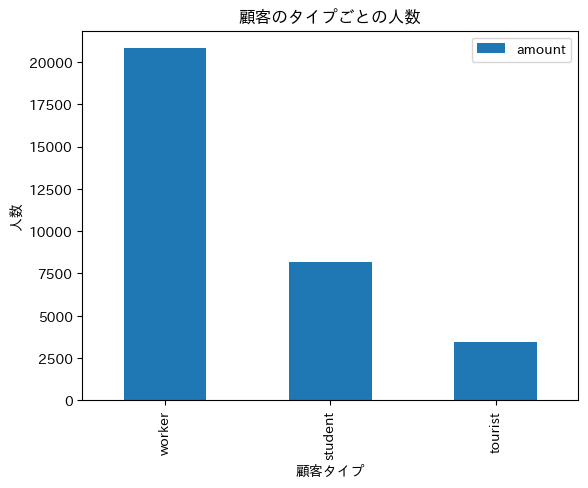

In [59]:
(df_pos
 .group_by('customer_type')
 .agg(pl.col('amount').count())
 .sort('amount',descending=True)
 .to_pandas()
 .plot(kind='bar', x='customer_type', y='amount')
)

plt.title('顧客のタイプごとの人数')
plt.xlabel('顧客タイプ')
plt.ylabel('人数')


### 顧客ごとの売上金額

Text(0, 0.5, '金額（百万）')

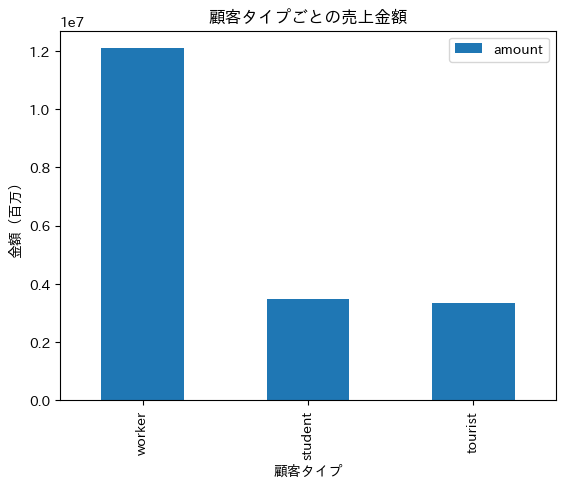

In [9]:
(df_pos
 .group_by('customer_type')
 .agg(pl.col('amount').sum())
 .sort('amount',descending=True)

 .to_pandas()
 .plot(kind='bar', x='customer_type', y='amount')
)

plt.title('顧客タイプごとの売上金額')
plt.xlabel('顧客タイプ')
plt.ylabel('金額（百万）')

### 支払い方法の分布

In [10]:
(df_pos
 .group_by('payment_method')
 .agg(pl.col('amount').count())
)

payment_method,amount
str,u32
"""電子マネー""",10835
"""カード""",10768
"""現金""",10856


Text(0, 0.5, '人数')

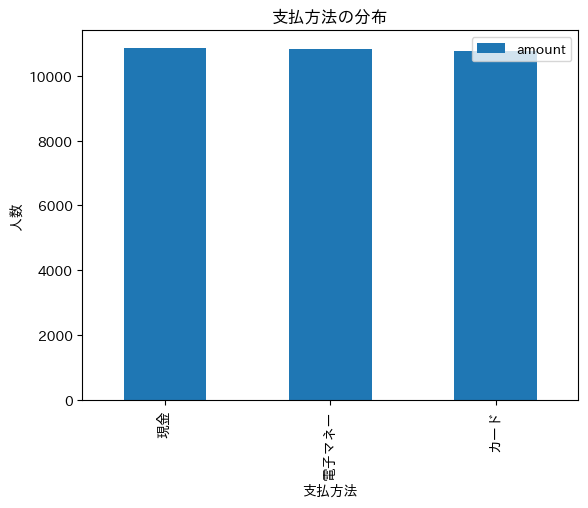

In [11]:
(df_pos
 .group_by('payment_method')
 .agg(pl.col('amount').count())
 .sort('amount',descending=True)
 .to_pandas()
 .plot(kind='bar', x='payment_method', y='amount')
)

plt.title('支払方法の分布')
plt.xlabel('支払方法')
plt.ylabel('人数')


### 顧客タイプごとの支払い方法

Text(0, 0.5, '支払い回数')

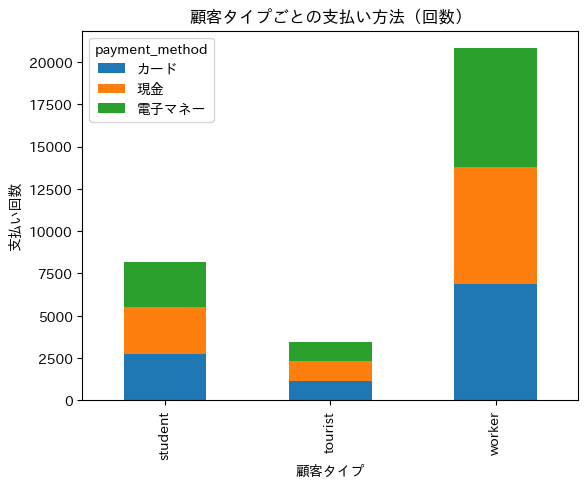

In [12]:
(df_pos
 .to_pandas()
 .pivot_table(
        index='customer_type',       # 行にする列
        columns='payment_method',    # 列にする列
        aggfunc='size',              # 件数をカウント
    )
 .plot(kind='bar', stacked=True)
)

plt.title('顧客タイプごとの支払い方法（回数）')
plt.xlabel('顧客タイプ')
plt.ylabel('支払い回数')

# .pivot_table ??



### 天気ごとの売り上げ

In [13]:
(df_pos
 .with_columns(
     pl
.when(pl.col('datetime').str.contains('2024/1/1')).then(pl.lit('2024-01-01'))
.when(pl.col('datetime').str.contains('2024/1/2')).then(pl.lit('2024-01-02'))
.when(pl.col('datetime').str.contains('2024/1/3')).then(pl.lit('2024-01-03'))
.when(pl.col('datetime').str.contains('2024/1/4')).then(pl.lit('2024-01-04'))
.when(pl.col('datetime').str.contains('2024/1/5')).then(pl.lit('2024-01-05'))
.when(pl.col('datetime').str.contains('2024/1/6')).then(pl.lit('2024-01-06'))
.when(pl.col('datetime').str.contains('2024/1/7')).then(pl.lit('2024-01-07'))
.when(pl.col('datetime').str.contains('2024/1/8')).then(pl.lit('2024-01-08'))
.when(pl.col('datetime').str.contains('2024/1/9')).then(pl.lit('2024-01-09'))
.when(pl.col('datetime').str.contains('2024/1/10')).then(pl.lit('2024-01-10'))
.when(pl.col('datetime').str.contains('2024/1/11')).then(pl.lit('2024-01-11'))
.when(pl.col('datetime').str.contains('2024/1/12')).then(pl.lit('2024-01-12'))
.when(pl.col('datetime').str.contains('2024/1/13')).then(pl.lit('2024-01-13'))
.when(pl.col('datetime').str.contains('2024/1/14')).then(pl.lit('2024-01-14'))
.when(pl.col('datetime').str.contains('2024/1/15')).then(pl.lit('2024-01-15'))
.when(pl.col('datetime').str.contains('2024/1/16')).then(pl.lit('2024-01-16'))
.when(pl.col('datetime').str.contains('2024/1/17')).then(pl.lit('2024-01-17'))
.when(pl.col('datetime').str.contains('2024/1/18')).then(pl.lit('2024-01-18'))
.when(pl.col('datetime').str.contains('2024/1/19')).then(pl.lit('2024-01-19'))
.when(pl.col('datetime').str.contains('2024/1/20')).then(pl.lit('2024-01-20'))
.when(pl.col('datetime').str.contains('2024/1/21')).then(pl.lit('2024-01-21'))
.when(pl.col('datetime').str.contains('2024/1/22')).then(pl.lit('2024-01-22'))
.when(pl.col('datetime').str.contains('2024/1/23')).then(pl.lit('2024-01-23'))
.when(pl.col('datetime').str.contains('2024/1/24')).then(pl.lit('2024-01-24'))
.when(pl.col('datetime').str.contains('2024/1/25')).then(pl.lit('2024-01-25'))
.when(pl.col('datetime').str.contains('2024/1/26')).then(pl.lit('2024-01-26'))
.when(pl.col('datetime').str.contains('2024/1/27')).then(pl.lit('2024-01-27'))
.when(pl.col('datetime').str.contains('2024/1/28')).then(pl.lit('2024-01-28'))
.when(pl.col('datetime').str.contains('2024/1/29')).then(pl.lit('2024-01-29'))
.when(pl.col('datetime').str.contains('2024/1/30')).then(pl.lit('2024-01-30'))
.when(pl.col('datetime').str.contains('2024/1/31')).then(pl.lit('2024-01-31'))
.when(pl.col('datetime').str.contains('2024/2/1')).then(pl.lit('2024-02-01'))
.when(pl.col('datetime').str.contains('2024/2/2')).then(pl.lit('2024-02-02'))
.when(pl.col('datetime').str.contains('2024/2/3')).then(pl.lit('2024-02-03'))
.when(pl.col('datetime').str.contains('2024/2/4')).then(pl.lit('2024-02-04'))
.when(pl.col('datetime').str.contains('2024/2/5')).then(pl.lit('2024-02-05'))
.when(pl.col('datetime').str.contains('2024/2/6')).then(pl.lit('2024-02-06'))
.when(pl.col('datetime').str.contains('2024/2/7')).then(pl.lit('2024-02-07'))
.when(pl.col('datetime').str.contains('2024/2/8')).then(pl.lit('2024-02-08'))
.when(pl.col('datetime').str.contains('2024/2/9')).then(pl.lit('2024-02-09'))
.when(pl.col('datetime').str.contains('2024/2/10')).then(pl.lit('2024-02-10'))
.when(pl.col('datetime').str.contains('2024/2/11')).then(pl.lit('2024-02-11'))
.when(pl.col('datetime').str.contains('2024/2/12')).then(pl.lit('2024-02-12'))
.when(pl.col('datetime').str.contains('2024/2/13')).then(pl.lit('2024-02-13'))
.when(pl.col('datetime').str.contains('2024/2/14')).then(pl.lit('2024-02-14'))
.when(pl.col('datetime').str.contains('2024/2/15')).then(pl.lit('2024-02-15'))
.when(pl.col('datetime').str.contains('2024/2/16')).then(pl.lit('2024-02-16'))
.when(pl.col('datetime').str.contains('2024/2/17')).then(pl.lit('2024-02-17'))
.when(pl.col('datetime').str.contains('2024/2/18')).then(pl.lit('2024-02-18'))
.when(pl.col('datetime').str.contains('2024/2/19')).then(pl.lit('2024-02-19'))
.when(pl.col('datetime').str.contains('2024/2/20')).then(pl.lit('2024-02-20'))
.when(pl.col('datetime').str.contains('2024/2/21')).then(pl.lit('2024-02-21'))
.when(pl.col('datetime').str.contains('2024/2/22')).then(pl.lit('2024-02-22'))
.when(pl.col('datetime').str.contains('2024/2/23')).then(pl.lit('2024-02-23'))
.when(pl.col('datetime').str.contains('2024/2/24')).then(pl.lit('2024-02-24'))
.when(pl.col('datetime').str.contains('2024/2/25')).then(pl.lit('2024-02-25'))
.when(pl.col('datetime').str.contains('2024/2/26')).then(pl.lit('2024-02-26'))
.when(pl.col('datetime').str.contains('2024/2/27')).then(pl.lit('2024-02-27'))
.when(pl.col('datetime').str.contains('2024/2/28')).then(pl.lit('2024-02-28'))
.when(pl.col('datetime').str.contains('2024/2/29')).then(pl.lit('2024-02-29'))
.when(pl.col('datetime').str.contains('2024/3/1')).then(pl.lit('2024-03-01'))
.when(pl.col('datetime').str.contains('2024/3/2')).then(pl.lit('2024-03-02'))
.when(pl.col('datetime').str.contains('2024/3/3')).then(pl.lit('2024-03-03'))
.when(pl.col('datetime').str.contains('2024/3/4')).then(pl.lit('2024-03-04'))
.when(pl.col('datetime').str.contains('2024/3/5')).then(pl.lit('2024-03-05'))
.when(pl.col('datetime').str.contains('2024/3/6')).then(pl.lit('2024-03-06'))
.when(pl.col('datetime').str.contains('2024/3/7')).then(pl.lit('2024-03-07'))
.when(pl.col('datetime').str.contains('2024/3/8')).then(pl.lit('2024-03-08'))
.when(pl.col('datetime').str.contains('2024/3/9')).then(pl.lit('2024-03-09'))
.when(pl.col('datetime').str.contains('2024/3/10')).then(pl.lit('2024-03-10'))
.when(pl.col('datetime').str.contains('2024/3/11')).then(pl.lit('2024-03-11'))
.when(pl.col('datetime').str.contains('2024/3/12')).then(pl.lit('2024-03-12'))
.when(pl.col('datetime').str.contains('2024/3/13')).then(pl.lit('2024-03-13'))
.when(pl.col('datetime').str.contains('2024/3/14')).then(pl.lit('2024-03-14'))
.when(pl.col('datetime').str.contains('2024/3/15')).then(pl.lit('2024-03-15'))
.when(pl.col('datetime').str.contains('2024/3/16')).then(pl.lit('2024-03-16'))
.when(pl.col('datetime').str.contains('2024/3/17')).then(pl.lit('2024-03-17'))
.when(pl.col('datetime').str.contains('2024/3/18')).then(pl.lit('2024-03-18'))
.when(pl.col('datetime').str.contains('2024/3/19')).then(pl.lit('2024-03-19'))
.when(pl.col('datetime').str.contains('2024/3/20')).then(pl.lit('2024-03-20'))
.when(pl.col('datetime').str.contains('2024/3/21')).then(pl.lit('2024-03-21'))
.when(pl.col('datetime').str.contains('2024/3/22')).then(pl.lit('2024-03-22'))
.when(pl.col('datetime').str.contains('2024/3/23')).then(pl.lit('2024-03-23'))
.when(pl.col('datetime').str.contains('2024/3/24')).then(pl.lit('2024-03-24'))
.when(pl.col('datetime').str.contains('2024/3/25')).then(pl.lit('2024-03-25'))
.when(pl.col('datetime').str.contains('2024/3/26')).then(pl.lit('2024-03-26'))
.when(pl.col('datetime').str.contains('2024/3/27')).then(pl.lit('2024-03-27'))
.when(pl.col('datetime').str.contains('2024/3/28')).then(pl.lit('2024-03-28'))
.when(pl.col('datetime').str.contains('2024/3/29')).then(pl.lit('2024-03-29'))
.when(pl.col('datetime').str.contains('2024/3/30')).then(pl.lit('2024-03-30'))
.when(pl.col('datetime').str.contains('2024/3/31')).then(pl.lit('2024-03-31'))
.when(pl.col('datetime').str.contains('2024/4/1')).then(pl.lit('2024-04-01'))
.when(pl.col('datetime').str.contains('2024/4/2')).then(pl.lit('2024-04-02'))
.when(pl.col('datetime').str.contains('2024/4/3')).then(pl.lit('2024-04-03'))
.when(pl.col('datetime').str.contains('2024/4/4')).then(pl.lit('2024-04-04'))
.when(pl.col('datetime').str.contains('2024/4/5')).then(pl.lit('2024-04-05'))
.when(pl.col('datetime').str.contains('2024/4/6')).then(pl.lit('2024-04-06'))
.when(pl.col('datetime').str.contains('2024/4/7')).then(pl.lit('2024-04-07'))
.when(pl.col('datetime').str.contains('2024/4/8')).then(pl.lit('2024-04-08'))
.when(pl.col('datetime').str.contains('2024/4/9')).then(pl.lit('2024-04-09'))
.when(pl.col('datetime').str.contains('2024/4/10')).then(pl.lit('2024-04-10'))
.when(pl.col('datetime').str.contains('2024/4/11')).then(pl.lit('2024-04-11'))
.when(pl.col('datetime').str.contains('2024/4/12')).then(pl.lit('2024-04-12'))
.when(pl.col('datetime').str.contains('2024/4/13')).then(pl.lit('2024-04-13'))
.when(pl.col('datetime').str.contains('2024/4/14')).then(pl.lit('2024-04-14'))
.when(pl.col('datetime').str.contains('2024/4/15')).then(pl.lit('2024-04-15'))
.when(pl.col('datetime').str.contains('2024/4/16')).then(pl.lit('2024-04-16'))
.when(pl.col('datetime').str.contains('2024/4/17')).then(pl.lit('2024-04-17'))
.when(pl.col('datetime').str.contains('2024/4/18')).then(pl.lit('2024-04-18'))
.when(pl.col('datetime').str.contains('2024/4/19')).then(pl.lit('2024-04-19'))
.when(pl.col('datetime').str.contains('2024/4/20')).then(pl.lit('2024-04-20'))
.when(pl.col('datetime').str.contains('2024/4/21')).then(pl.lit('2024-04-21'))
.when(pl.col('datetime').str.contains('2024/4/22')).then(pl.lit('2024-04-22'))
.when(pl.col('datetime').str.contains('2024/4/23')).then(pl.lit('2024-04-23'))
.when(pl.col('datetime').str.contains('2024/4/24')).then(pl.lit('2024-04-24'))
.when(pl.col('datetime').str.contains('2024/4/25')).then(pl.lit('2024-04-25'))
.when(pl.col('datetime').str.contains('2024/4/26')).then(pl.lit('2024-04-26'))
.when(pl.col('datetime').str.contains('2024/4/27')).then(pl.lit('2024-04-27'))
.when(pl.col('datetime').str.contains('2024/4/28')).then(pl.lit('2024-04-28'))
.when(pl.col('datetime').str.contains('2024/4/29')).then(pl.lit('2024-04-29'))
.when(pl.col('datetime').str.contains('2024/4/30')).then(pl.lit('2024-04-30'))
.when(pl.col('datetime').str.contains('2024/5/1')).then(pl.lit('2024-05-01'))
.when(pl.col('datetime').str.contains('2024/5/2')).then(pl.lit('2024-05-02'))
.when(pl.col('datetime').str.contains('2024/5/3')).then(pl.lit('2024-05-03'))
.when(pl.col('datetime').str.contains('2024/5/4')).then(pl.lit('2024-05-04'))
.when(pl.col('datetime').str.contains('2024/5/5')).then(pl.lit('2024-05-05'))
.when(pl.col('datetime').str.contains('2024/5/6')).then(pl.lit('2024-05-06'))
.when(pl.col('datetime').str.contains('2024/5/7')).then(pl.lit('2024-05-07'))
.when(pl.col('datetime').str.contains('2024/5/8')).then(pl.lit('2024-05-08'))
.when(pl.col('datetime').str.contains('2024/5/9')).then(pl.lit('2024-05-09'))
.when(pl.col('datetime').str.contains('2024/5/10')).then(pl.lit('2024-05-10'))
.when(pl.col('datetime').str.contains('2024/5/11')).then(pl.lit('2024-05-11'))
.when(pl.col('datetime').str.contains('2024/5/12')).then(pl.lit('2024-05-12'))
.when(pl.col('datetime').str.contains('2024/5/13')).then(pl.lit('2024-05-13'))
.when(pl.col('datetime').str.contains('2024/5/14')).then(pl.lit('2024-05-14'))
.when(pl.col('datetime').str.contains('2024/5/15')).then(pl.lit('2024-05-15'))
.when(pl.col('datetime').str.contains('2024/5/16')).then(pl.lit('2024-05-16'))
.when(pl.col('datetime').str.contains('2024/5/17')).then(pl.lit('2024-05-17'))
.when(pl.col('datetime').str.contains('2024/5/18')).then(pl.lit('2024-05-18'))
.when(pl.col('datetime').str.contains('2024/5/19')).then(pl.lit('2024-05-19'))
.when(pl.col('datetime').str.contains('2024/5/20')).then(pl.lit('2024-05-20'))
.when(pl.col('datetime').str.contains('2024/5/21')).then(pl.lit('2024-05-21'))
.when(pl.col('datetime').str.contains('2024/5/22')).then(pl.lit('2024-05-22'))
.when(pl.col('datetime').str.contains('2024/5/23')).then(pl.lit('2024-05-23'))
.when(pl.col('datetime').str.contains('2024/5/24')).then(pl.lit('2024-05-24'))
.when(pl.col('datetime').str.contains('2024/5/25')).then(pl.lit('2024-05-25'))
.when(pl.col('datetime').str.contains('2024/5/26')).then(pl.lit('2024-05-26'))
.when(pl.col('datetime').str.contains('2024/5/27')).then(pl.lit('2024-05-27'))
.when(pl.col('datetime').str.contains('2024/5/28')).then(pl.lit('2024-05-28'))
.when(pl.col('datetime').str.contains('2024/5/29')).then(pl.lit('2024-05-29'))
.when(pl.col('datetime').str.contains('2024/5/30')).then(pl.lit('2024-05-30'))
.when(pl.col('datetime').str.contains('2024/5/31')).then(pl.lit('2024-05-31'))
.when(pl.col('datetime').str.contains('2024/6/1')).then(pl.lit('2024-06-01'))
.when(pl.col('datetime').str.contains('2024/6/2')).then(pl.lit('2024-06-02'))
.when(pl.col('datetime').str.contains('2024/6/3')).then(pl.lit('2024-06-03'))
.when(pl.col('datetime').str.contains('2024/6/4')).then(pl.lit('2024-06-04'))
.when(pl.col('datetime').str.contains('2024/6/5')).then(pl.lit('2024-06-05'))
.when(pl.col('datetime').str.contains('2024/6/6')).then(pl.lit('2024-06-06'))
.when(pl.col('datetime').str.contains('2024/6/7')).then(pl.lit('2024-06-07'))
.when(pl.col('datetime').str.contains('2024/6/8')).then(pl.lit('2024-06-08'))
.when(pl.col('datetime').str.contains('2024/6/9')).then(pl.lit('2024-06-09'))
.when(pl.col('datetime').str.contains('2024/6/10')).then(pl.lit('2024-06-10'))
.when(pl.col('datetime').str.contains('2024/6/11')).then(pl.lit('2024-06-11'))
.when(pl.col('datetime').str.contains('2024/6/12')).then(pl.lit('2024-06-12'))
.when(pl.col('datetime').str.contains('2024/6/13')).then(pl.lit('2024-06-13'))
.when(pl.col('datetime').str.contains('2024/6/14')).then(pl.lit('2024-06-14'))
.when(pl.col('datetime').str.contains('2024/6/15')).then(pl.lit('2024-06-15'))
.when(pl.col('datetime').str.contains('2024/6/16')).then(pl.lit('2024-06-16'))
.when(pl.col('datetime').str.contains('2024/6/17')).then(pl.lit('2024-06-17'))
.when(pl.col('datetime').str.contains('2024/6/18')).then(pl.lit('2024-06-18'))
.when(pl.col('datetime').str.contains('2024/6/19')).then(pl.lit('2024-06-19'))
.when(pl.col('datetime').str.contains('2024/6/20')).then(pl.lit('2024-06-20'))
.when(pl.col('datetime').str.contains('2024/6/21')).then(pl.lit('2024-06-21'))
.when(pl.col('datetime').str.contains('2024/6/22')).then(pl.lit('2024-06-22'))
.when(pl.col('datetime').str.contains('2024/6/23')).then(pl.lit('2024-06-23'))
.when(pl.col('datetime').str.contains('2024/6/24')).then(pl.lit('2024-06-24'))
.when(pl.col('datetime').str.contains('2024/6/25')).then(pl.lit('2024-06-25'))
.when(pl.col('datetime').str.contains('2024/6/26')).then(pl.lit('2024-06-26'))
.when(pl.col('datetime').str.contains('2024/6/27')).then(pl.lit('2024-06-27'))
.when(pl.col('datetime').str.contains('2024/6/28')).then(pl.lit('2024-06-28'))
.when(pl.col('datetime').str.contains('2024/6/29')).then(pl.lit('2024-06-29'))
.when(pl.col('datetime').str.contains('2024/6/30')).then(pl.lit('2024-06-30'))
.when(pl.col('datetime').str.contains('2024/7/1')).then(pl.lit('2024-07-01'))
.when(pl.col('datetime').str.contains('2024/7/2')).then(pl.lit('2024-07-02'))
.when(pl.col('datetime').str.contains('2024/7/3')).then(pl.lit('2024-07-03'))
.when(pl.col('datetime').str.contains('2024/7/4')).then(pl.lit('2024-07-04'))
.when(pl.col('datetime').str.contains('2024/7/5')).then(pl.lit('2024-07-05'))
.when(pl.col('datetime').str.contains('2024/7/6')).then(pl.lit('2024-07-06'))
.when(pl.col('datetime').str.contains('2024/7/7')).then(pl.lit('2024-07-07'))
.when(pl.col('datetime').str.contains('2024/7/8')).then(pl.lit('2024-07-08'))
.when(pl.col('datetime').str.contains('2024/7/9')).then(pl.lit('2024-07-09'))
.when(pl.col('datetime').str.contains('2024/7/10')).then(pl.lit('2024-07-10'))
.when(pl.col('datetime').str.contains('2024/7/11')).then(pl.lit('2024-07-11'))
.when(pl.col('datetime').str.contains('2024/7/12')).then(pl.lit('2024-07-12'))
.when(pl.col('datetime').str.contains('2024/7/13')).then(pl.lit('2024-07-13'))
.when(pl.col('datetime').str.contains('2024/7/14')).then(pl.lit('2024-07-14'))
.when(pl.col('datetime').str.contains('2024/7/15')).then(pl.lit('2024-07-15'))
.when(pl.col('datetime').str.contains('2024/7/16')).then(pl.lit('2024-07-16'))
.when(pl.col('datetime').str.contains('2024/7/17')).then(pl.lit('2024-07-17'))
.when(pl.col('datetime').str.contains('2024/7/18')).then(pl.lit('2024-07-18'))
.when(pl.col('datetime').str.contains('2024/7/19')).then(pl.lit('2024-07-19'))
.when(pl.col('datetime').str.contains('2024/7/20')).then(pl.lit('2024-07-20'))
.when(pl.col('datetime').str.contains('2024/7/21')).then(pl.lit('2024-07-21'))
.when(pl.col('datetime').str.contains('2024/7/22')).then(pl.lit('2024-07-22'))
.when(pl.col('datetime').str.contains('2024/7/23')).then(pl.lit('2024-07-23'))
.when(pl.col('datetime').str.contains('2024/7/24')).then(pl.lit('2024-07-24'))
.when(pl.col('datetime').str.contains('2024/7/25')).then(pl.lit('2024-07-25'))
.when(pl.col('datetime').str.contains('2024/7/26')).then(pl.lit('2024-07-26'))
.when(pl.col('datetime').str.contains('2024/7/27')).then(pl.lit('2024-07-27'))
.when(pl.col('datetime').str.contains('2024/7/28')).then(pl.lit('2024-07-28'))
.when(pl.col('datetime').str.contains('2024/7/29')).then(pl.lit('2024-07-29'))
.when(pl.col('datetime').str.contains('2024/7/30')).then(pl.lit('2024-07-30'))
.when(pl.col('datetime').str.contains('2024/7/31')).then(pl.lit('2024-07-31'))
.when(pl.col('datetime').str.contains('2024/8/1')).then(pl.lit('2024-08-01'))
.when(pl.col('datetime').str.contains('2024/8/2')).then(pl.lit('2024-08-02'))
.when(pl.col('datetime').str.contains('2024/8/3')).then(pl.lit('2024-08-03'))
.when(pl.col('datetime').str.contains('2024/8/4')).then(pl.lit('2024-08-04'))
.when(pl.col('datetime').str.contains('2024/8/5')).then(pl.lit('2024-08-05'))
.when(pl.col('datetime').str.contains('2024/8/6')).then(pl.lit('2024-08-06'))
.when(pl.col('datetime').str.contains('2024/8/7')).then(pl.lit('2024-08-07'))
.when(pl.col('datetime').str.contains('2024/8/8')).then(pl.lit('2024-08-08'))
.when(pl.col('datetime').str.contains('2024/8/9')).then(pl.lit('2024-08-09'))
.when(pl.col('datetime').str.contains('2024/8/10')).then(pl.lit('2024-08-10'))
.when(pl.col('datetime').str.contains('2024/8/11')).then(pl.lit('2024-08-11'))
.when(pl.col('datetime').str.contains('2024/8/12')).then(pl.lit('2024-08-12'))
.when(pl.col('datetime').str.contains('2024/8/13')).then(pl.lit('2024-08-13'))
.when(pl.col('datetime').str.contains('2024/8/14')).then(pl.lit('2024-08-14'))
.when(pl.col('datetime').str.contains('2024/8/15')).then(pl.lit('2024-08-15'))
.when(pl.col('datetime').str.contains('2024/8/16')).then(pl.lit('2024-08-16'))
.when(pl.col('datetime').str.contains('2024/8/17')).then(pl.lit('2024-08-17'))
.when(pl.col('datetime').str.contains('2024/8/18')).then(pl.lit('2024-08-18'))
.when(pl.col('datetime').str.contains('2024/8/19')).then(pl.lit('2024-08-19'))
.when(pl.col('datetime').str.contains('2024/8/20')).then(pl.lit('2024-08-20'))
.when(pl.col('datetime').str.contains('2024/8/21')).then(pl.lit('2024-08-21'))
.when(pl.col('datetime').str.contains('2024/8/22')).then(pl.lit('2024-08-22'))
.when(pl.col('datetime').str.contains('2024/8/23')).then(pl.lit('2024-08-23'))
.when(pl.col('datetime').str.contains('2024/8/24')).then(pl.lit('2024-08-24'))
.when(pl.col('datetime').str.contains('2024/8/25')).then(pl.lit('2024-08-25'))
.when(pl.col('datetime').str.contains('2024/8/26')).then(pl.lit('2024-08-26'))
.when(pl.col('datetime').str.contains('2024/8/27')).then(pl.lit('2024-08-27'))
.when(pl.col('datetime').str.contains('2024/8/28')).then(pl.lit('2024-08-28'))
.when(pl.col('datetime').str.contains('2024/8/29')).then(pl.lit('2024-08-29'))
.when(pl.col('datetime').str.contains('2024/8/30')).then(pl.lit('2024-08-30'))
.when(pl.col('datetime').str.contains('2024/8/31')).then(pl.lit('2024-08-31'))
.when(pl.col('datetime').str.contains('2024/9/1')).then(pl.lit('2024-09-01'))
.when(pl.col('datetime').str.contains('2024/9/2')).then(pl.lit('2024-09-02'))
.when(pl.col('datetime').str.contains('2024/9/3')).then(pl.lit('2024-09-03'))
.when(pl.col('datetime').str.contains('2024/9/4')).then(pl.lit('2024-09-04'))
.when(pl.col('datetime').str.contains('2024/9/5')).then(pl.lit('2024-09-05'))
.when(pl.col('datetime').str.contains('2024/9/6')).then(pl.lit('2024-09-06'))
.when(pl.col('datetime').str.contains('2024/9/7')).then(pl.lit('2024-09-07'))
.when(pl.col('datetime').str.contains('2024/9/8')).then(pl.lit('2024-09-08'))
.when(pl.col('datetime').str.contains('2024/9/9')).then(pl.lit('2024-09-09'))
.when(pl.col('datetime').str.contains('2024/9/10')).then(pl.lit('2024-09-10'))
.when(pl.col('datetime').str.contains('2024/9/11')).then(pl.lit('2024-09-11'))
.when(pl.col('datetime').str.contains('2024/9/12')).then(pl.lit('2024-09-12'))
.when(pl.col('datetime').str.contains('2024/9/13')).then(pl.lit('2024-09-13'))
.when(pl.col('datetime').str.contains('2024/9/14')).then(pl.lit('2024-09-14'))
.when(pl.col('datetime').str.contains('2024/9/15')).then(pl.lit('2024-09-15'))
.when(pl.col('datetime').str.contains('2024/9/16')).then(pl.lit('2024-09-16'))
.when(pl.col('datetime').str.contains('2024/9/17')).then(pl.lit('2024-09-17'))
.when(pl.col('datetime').str.contains('2024/9/18')).then(pl.lit('2024-09-18'))
.when(pl.col('datetime').str.contains('2024/9/19')).then(pl.lit('2024-09-19'))
.when(pl.col('datetime').str.contains('2024/9/20')).then(pl.lit('2024-09-20'))
.when(pl.col('datetime').str.contains('2024/9/21')).then(pl.lit('2024-09-21'))
.when(pl.col('datetime').str.contains('2024/9/22')).then(pl.lit('2024-09-22'))
.when(pl.col('datetime').str.contains('2024/9/23')).then(pl.lit('2024-09-23'))
.when(pl.col('datetime').str.contains('2024/9/24')).then(pl.lit('2024-09-24'))
.when(pl.col('datetime').str.contains('2024/9/25')).then(pl.lit('2024-09-25'))
.when(pl.col('datetime').str.contains('2024/9/26')).then(pl.lit('2024-09-26'))
.when(pl.col('datetime').str.contains('2024/9/27')).then(pl.lit('2024-09-27'))
.when(pl.col('datetime').str.contains('2024/9/28')).then(pl.lit('2024-09-28'))
.when(pl.col('datetime').str.contains('2024/9/29')).then(pl.lit('2024-09-29'))
.when(pl.col('datetime').str.contains('2024/9/30')).then(pl.lit('2024-09-30'))
.when(pl.col('datetime').str.contains('2024/10/1')).then(pl.lit('2024-10-01'))
.when(pl.col('datetime').str.contains('2024/10/2')).then(pl.lit('2024-10-02'))
.when(pl.col('datetime').str.contains('2024/10/3')).then(pl.lit('2024-10-03'))
.when(pl.col('datetime').str.contains('2024/10/4')).then(pl.lit('2024-10-04'))
.when(pl.col('datetime').str.contains('2024/10/5')).then(pl.lit('2024-10-05'))
.when(pl.col('datetime').str.contains('2024/10/6')).then(pl.lit('2024-10-06'))
.when(pl.col('datetime').str.contains('2024/10/7')).then(pl.lit('2024-10-07'))
.when(pl.col('datetime').str.contains('2024/10/8')).then(pl.lit('2024-10-08'))
.when(pl.col('datetime').str.contains('2024/10/9')).then(pl.lit('2024-10-09'))
.when(pl.col('datetime').str.contains('2024/10/10')).then(pl.lit('2024-10-10'))
.when(pl.col('datetime').str.contains('2024/10/11')).then(pl.lit('2024-10-11'))
.when(pl.col('datetime').str.contains('2024/10/12')).then(pl.lit('2024-10-12'))
.when(pl.col('datetime').str.contains('2024/10/13')).then(pl.lit('2024-10-13'))
.when(pl.col('datetime').str.contains('2024/10/14')).then(pl.lit('2024-10-14'))
.when(pl.col('datetime').str.contains('2024/10/15')).then(pl.lit('2024-10-15'))
.when(pl.col('datetime').str.contains('2024/10/16')).then(pl.lit('2024-10-16'))
.when(pl.col('datetime').str.contains('2024/10/17')).then(pl.lit('2024-10-17'))
.when(pl.col('datetime').str.contains('2024/10/18')).then(pl.lit('2024-10-18'))
.when(pl.col('datetime').str.contains('2024/10/19')).then(pl.lit('2024-10-19'))
.when(pl.col('datetime').str.contains('2024/10/20')).then(pl.lit('2024-10-20'))
.when(pl.col('datetime').str.contains('2024/10/21')).then(pl.lit('2024-10-21'))
.when(pl.col('datetime').str.contains('2024/10/22')).then(pl.lit('2024-10-22'))
.when(pl.col('datetime').str.contains('2024/10/23')).then(pl.lit('2024-10-23'))
.when(pl.col('datetime').str.contains('2024/10/24')).then(pl.lit('2024-10-24'))
.when(pl.col('datetime').str.contains('2024/10/25')).then(pl.lit('2024-10-25'))
.when(pl.col('datetime').str.contains('2024/10/26')).then(pl.lit('2024-10-26'))
.when(pl.col('datetime').str.contains('2024/10/27')).then(pl.lit('2024-10-27'))
.when(pl.col('datetime').str.contains('2024/10/28')).then(pl.lit('2024-10-28'))
.when(pl.col('datetime').str.contains('2024/10/29')).then(pl.lit('2024-10-29'))
.when(pl.col('datetime').str.contains('2024/10/30')).then(pl.lit('2024-10-30'))
.when(pl.col('datetime').str.contains('2024/10/31')).then(pl.lit('2024-10-31'))
.when(pl.col('datetime').str.contains('2024/11/1')).then(pl.lit('2024-11-01'))
.when(pl.col('datetime').str.contains('2024/11/2')).then(pl.lit('2024-11-02'))
.when(pl.col('datetime').str.contains('2024/11/3')).then(pl.lit('2024-11-03'))
.when(pl.col('datetime').str.contains('2024/11/4')).then(pl.lit('2024-11-04'))
.when(pl.col('datetime').str.contains('2024/11/5')).then(pl.lit('2024-11-05'))
.when(pl.col('datetime').str.contains('2024/11/6')).then(pl.lit('2024-11-06'))
.when(pl.col('datetime').str.contains('2024/11/7')).then(pl.lit('2024-11-07'))
.when(pl.col('datetime').str.contains('2024/11/8')).then(pl.lit('2024-11-08'))
.when(pl.col('datetime').str.contains('2024/11/9')).then(pl.lit('2024-11-09'))
.when(pl.col('datetime').str.contains('2024/11/10')).then(pl.lit('2024-11-10'))
.when(pl.col('datetime').str.contains('2024/11/11')).then(pl.lit('2024-11-11'))
.when(pl.col('datetime').str.contains('2024/11/12')).then(pl.lit('2024-11-12'))
.when(pl.col('datetime').str.contains('2024/11/13')).then(pl.lit('2024-11-13'))
.when(pl.col('datetime').str.contains('2024/11/14')).then(pl.lit('2024-11-14'))
.when(pl.col('datetime').str.contains('2024/11/15')).then(pl.lit('2024-11-15'))
.when(pl.col('datetime').str.contains('2024/11/16')).then(pl.lit('2024-11-16'))
.when(pl.col('datetime').str.contains('2024/11/17')).then(pl.lit('2024-11-17'))
.when(pl.col('datetime').str.contains('2024/11/18')).then(pl.lit('2024-11-18'))
.when(pl.col('datetime').str.contains('2024/11/19')).then(pl.lit('2024-11-19'))
.when(pl.col('datetime').str.contains('2024/11/20')).then(pl.lit('2024-11-20'))
.when(pl.col('datetime').str.contains('2024/11/21')).then(pl.lit('2024-11-21'))
.when(pl.col('datetime').str.contains('2024/11/22')).then(pl.lit('2024-11-22'))
.when(pl.col('datetime').str.contains('2024/11/23')).then(pl.lit('2024-11-23'))
.when(pl.col('datetime').str.contains('2024/11/24')).then(pl.lit('2024-11-24'))
.when(pl.col('datetime').str.contains('2024/11/25')).then(pl.lit('2024-11-25'))
.when(pl.col('datetime').str.contains('2024/11/26')).then(pl.lit('2024-11-26'))
.when(pl.col('datetime').str.contains('2024/11/27')).then(pl.lit('2024-11-27'))
.when(pl.col('datetime').str.contains('2024/11/28')).then(pl.lit('2024-11-28'))
.when(pl.col('datetime').str.contains('2024/11/29')).then(pl.lit('2024-11-29'))
.when(pl.col('datetime').str.contains('2024/11/30')).then(pl.lit('2024-11-30'))
.when(pl.col('datetime').str.contains('2024/12/1')).then(pl.lit('2024-12-01'))
.when(pl.col('datetime').str.contains('2024/12/2')).then(pl.lit('2024-12-02'))
.when(pl.col('datetime').str.contains('2024/12/3')).then(pl.lit('2024-12-03'))
.when(pl.col('datetime').str.contains('2024/12/4')).then(pl.lit('2024-12-04'))
.when(pl.col('datetime').str.contains('2024/12/5')).then(pl.lit('2024-12-05'))
.when(pl.col('datetime').str.contains('2024/12/6')).then(pl.lit('2024-12-06'))
.when(pl.col('datetime').str.contains('2024/12/7')).then(pl.lit('2024-12-07'))
.when(pl.col('datetime').str.contains('2024/12/8')).then(pl.lit('2024-12-08'))
.when(pl.col('datetime').str.contains('2024/12/9')).then(pl.lit('2024-12-09'))
.when(pl.col('datetime').str.contains('2024/12/10')).then(pl.lit('2024-12-10'))
.when(pl.col('datetime').str.contains('2024/12/11')).then(pl.lit('2024-12-11'))
.when(pl.col('datetime').str.contains('2024/12/12')).then(pl.lit('2024-12-12'))
.when(pl.col('datetime').str.contains('2024/12/13')).then(pl.lit('2024-12-13'))
.when(pl.col('datetime').str.contains('2024/12/14')).then(pl.lit('2024-12-14'))
.when(pl.col('datetime').str.contains('2024/12/15')).then(pl.lit('2024-12-15'))
.when(pl.col('datetime').str.contains('2024/12/16')).then(pl.lit('2024-12-16'))
.when(pl.col('datetime').str.contains('2024/12/17')).then(pl.lit('2024-12-17'))
.when(pl.col('datetime').str.contains('2024/12/18')).then(pl.lit('2024-12-18'))
.when(pl.col('datetime').str.contains('2024/12/19')).then(pl.lit('2024-12-19'))
.when(pl.col('datetime').str.contains('2024/12/20')).then(pl.lit('2024-12-20'))
.when(pl.col('datetime').str.contains('2024/12/21')).then(pl.lit('2024-12-21'))
.when(pl.col('datetime').str.contains('2024/12/22')).then(pl.lit('2024-12-22'))
.when(pl.col('datetime').str.contains('2024/12/23')).then(pl.lit('2024-12-23'))
.when(pl.col('datetime').str.contains('2024/12/24')).then(pl.lit('2024-12-24'))
.when(pl.col('datetime').str.contains('2024/12/25')).then(pl.lit('2024-12-25'))
.when(pl.col('datetime').str.contains('2024/12/26')).then(pl.lit('2024-12-26'))
.when(pl.col('datetime').str.contains('2024/12/27')).then(pl.lit('2024-12-27'))
.when(pl.col('datetime').str.contains('2024/12/28')).then(pl.lit('2024-12-28'))
.when(pl.col('datetime').str.contains('2024/12/29')).then(pl.lit('2024-12-29'))
.when(pl.col('datetime').str.contains('2024/12/30')).then(pl.lit('2024-12-30'))
.when(pl.col('datetime').str.contains('2024/12/31')).then(pl.lit('2024-12-31'))
   
        .otherwise(0)
        .alias('date')
        )
 .join(df_weather
       
       ,how='inner'
       ,on='date')
 .group_by('weather')
 .agg(pl.col('amount').sum()
      ,((pl.col("amount").sum()) / (pl.col("date").count())).alias("avg_amount")
 )

)

weather,amount,avg_amount
str,i64,f64
"""晴れ""",13900720,600.878361
"""曇り""",2347650,577.95421
"""雨""",2649580,503.435303


In [63]:
(df_weather
 .group_by('weather')
 .agg(pl.col('date').count()
      )
)

weather,date
str,u32
"""晴れ""",265
"""曇り""",48
"""雨""",53
